In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

### GradientTape의 기본과정

In [32]:
t1 = tf.constant([1,2,3],dtype = tf.float32)
t2 = tf.Variable([10,20,30],dtype = tf.float32)

In [33]:
with tf.GradientTape() as tape:
    t3 = t1 * t2
    t4 = t3 + t2

In [34]:
t4.numpy()

array([ 20.,  60., 120.], dtype=float32)

In [35]:
gradients = tape.gradient(t4,[t1,t2,t3])
print(gradients)

[None, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>]


In [36]:
print('dt1 : ', gradients[0])
print('dt2 : ', gradients[1])
print('dt3 : ', gradients[2])

dt1 :  None
dt2 :  tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
dt3 :  tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


### 간단한 학습

In [58]:
x_data = tf.random.normal(shape=(1000,),dtype=tf.float32)
y_data = 2*x_data+2

In [59]:
w = tf.Variable(-1.)
b = tf.Variable(-1.)

LR = 0.01
EPOCHS = 10
w_trace, b_trace = [], []

In [60]:
for epoch in range(EPOCHS):
    for x, y in zip(x_data,y_data):
        with tf.GradientTape() as tape:
            prediction = w*x+b
            loss = (prediction-y)**2

        gradients = tape.gradient(loss, [w,b])

        w_trace.append(w.numpy())
        b_trace.append(b.numpy())
        w = tf.Variable(w-LR*gradients[0])
        b = tf.Variable(b-LR*gradients[1])

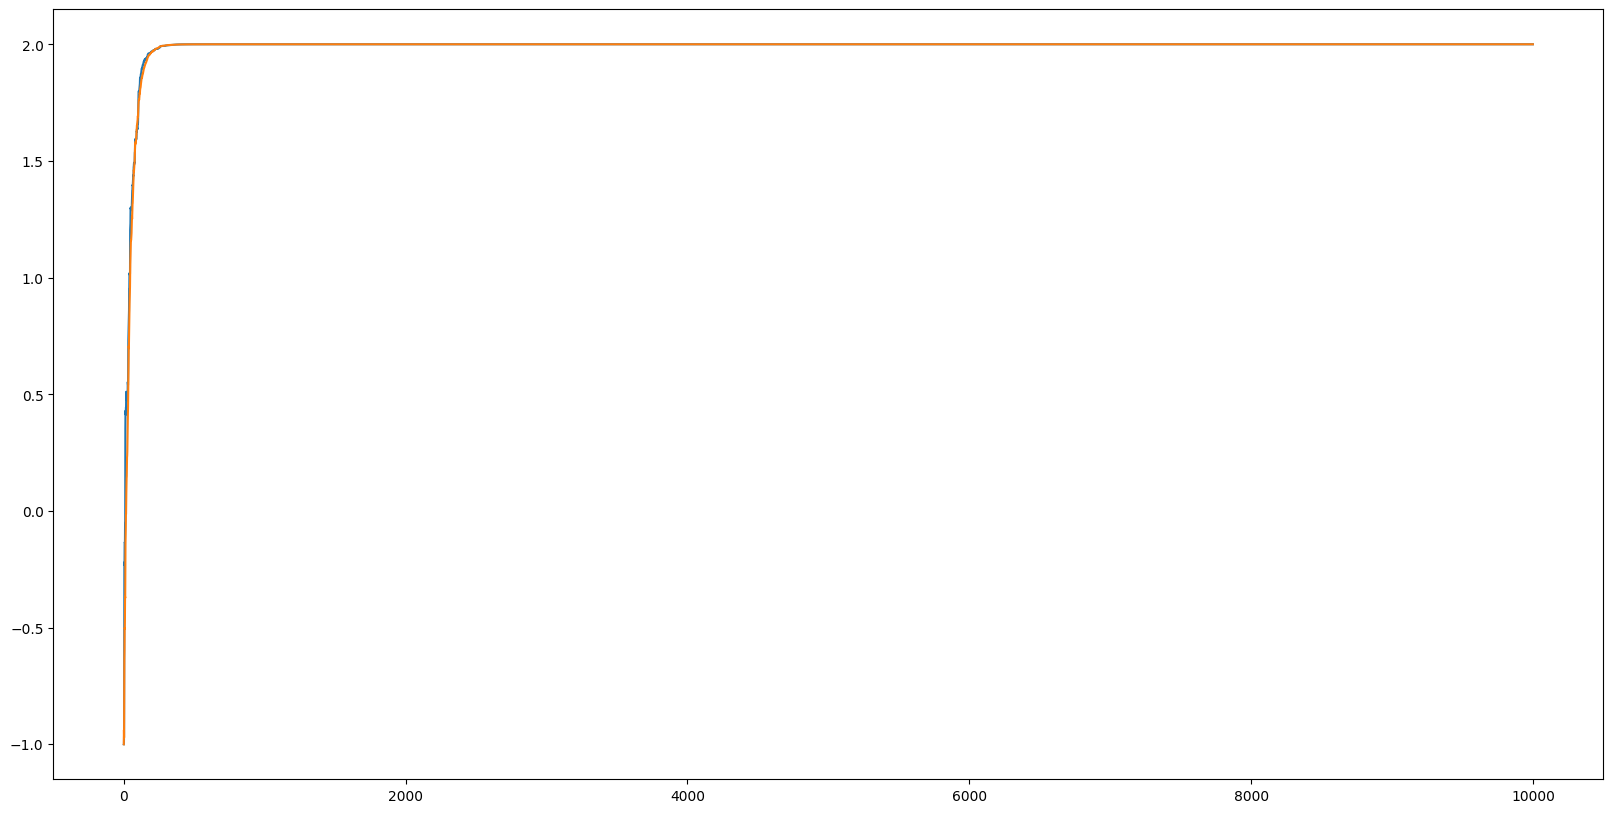

In [61]:
plt.figure(figsize=(20,10))
plt.plot(w_trace)
plt.plot(b_trace)
plt.show()